## Chapter 7



### AER

In [ ]:

print("Ch 7: IBM Q simulators and how they are used")
print("--------------------------------------------")

# Import Qiskit and load account
from qiskit import Aer, IBMQ

print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()


# Load backends
backends=Aer.backends()
print("\nAer backends:\n\n",backends)


# Collect Aer simulators
simulators=[]
for sim in range(0,len(backends)):
    backend = Aer.get_backend(str(backends[sim]))
    simulators.append(backend.configuration())

# Add IBM Q simulator
ibmq_simulator=provider.backends(simulator=True)
#simulators.append(provider.get_backend(str(ibmq_simulator[0])).configuration())
    
for qsim in range(0,len(ibmq_simulator)):
    backend = provider.get_backend(str(ibmq_simulator[qsim]))
    simulators.append(backend.configuration())

# Display the raw simulator configuration details
print("\nSimulator configuration details:")
for sim in range(0,len(simulators)):
    print("\n")
    print(simulators[sim].backend_name)
    print(simulators[sim].to_dict())
    
# Fish out criteria to compare
print("\n")
print("{0:25} {1:<10} {2:<10} {3:<10}".format("Name","#Qubits","Max shots.","Description"))
print("{0:25} {1:<10} {2:<10} {3:<10}".format("----","-------","--------","------------"))

description=[]
for sim in range(0,len(simulators)):
    if simulators[sim].local==True:
        description.append(simulators[sim].description)
    elif simulators[sim].local==False:
        description.append("Non-local IBM Q simulator")
    print("{0:25} {1:<10} {2:<10} {3:<10}".format(simulators[sim].backend_name,
                                                  simulators[sim].n_qubits,
                                                  simulators[sim].max_shots,
                                                  description[sim]))

Ch 7: IBM Q simulators and how they are used
--------------------------------------------
Getting provider...

Aer backends:

 [AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator'), PulseSimulator('pulse_simulator')]

Simulator configuration details:


aer_simulator
{'backend_name': 'aer_simulator', 'backend_version': '0.11.0', 'n_qubits': 29, 'basis_gates': ['ccx', 'cp', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'delay', 'diagonal', 'h', 'id', 'initialize', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_

### OOTB

Ch 7: Aer out of the box, a perfect quantum computer
----------------------------------------------------
Getting provider...
Enter number of SWAP gates to use: 3
Circuit with 3 SWAP gates.



┌───┐    ░     ░     ░ ┌─┐   
q_0: ┤ X ├─X──░──X──░──X──░─┤M├───
     └───┘ │  ░  │  ░  │  ░ └╥┘┌─┐
q_1: ──────X──░──X──░──X──░──╫─┤M├
              ░     ░     ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

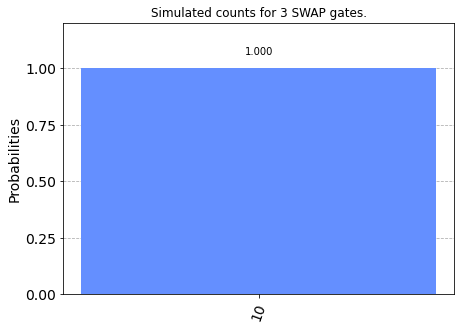

Simulated SWAP counts: {'10': 1000000}
Press enter to run on an IBM Q backend...

Least busy backend: ibmq_belem
Job Status: job has successfully run
NISQ SWAP counts: {'00': 1641, '01': 881, '10': 16444, '11': 1034}


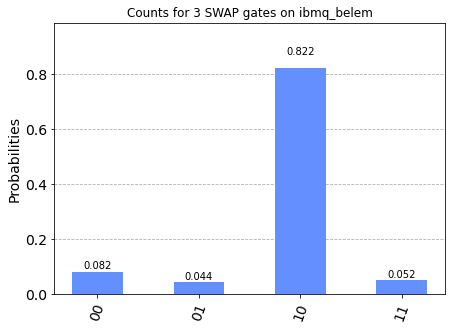

Press enter to transpile the circuit...

               ┌───┐     ┌───┐      ░      ┌───┐      ░      ┌───┐      ░ ┌─┐»
      q_0 -> 0 ┤ X ├──■──┤ X ├──■───░───■──┤ X ├──■───░───■──┤ X ├──■───░─┤M├»
               └───┘┌─┴─┐└─┬─┘┌─┴─┐ ░ ┌─┴─┐└─┬─┘┌─┴─┐ ░ ┌─┴─┐└─┬─┘┌─┴─┐ ░ └╥┘»
      q_1 -> 1 ─────┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░──╫─»
                    └───┘     └───┘ ░ └───┘     └───┘ ░ └───┘     └───┘ ░  ║ »
ancilla_0 -> 2 ────────────────────────────────────────────────────────────╫─»
                                                                           ║ »
ancilla_1 -> 3 ────────────────────────────────────────────────────────────╫─»
                                                                           ║ »
ancilla_2 -> 4 ────────────────────────────────────────────────────────────╫─»
                                                                           ║ »
          c: 2/════════════════════════════════════════════════════════════╩═»
           

In [ ]:
print("Ch 7: Aer out of the box, a perfect quantum computer")
print("----------------------------------------------------")

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, IBMQ, execute

# Import visualization tools
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from  IPython.core.display import display


# Load account
print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

# Enter number of SWAP gates to include with your circuit with (default 20)
user_input = input("Enter number of SWAP gates to use: ")
try:
   n = int(user_input)
except ValueError:
   n=10
n_gates=n

# Construct quantum circuit
circ = QuantumCircuit(2, 2)
circ.x(0)
while n >0:
    circ.swap(0,1)
    circ.barrier()
    n=n-1
circ.measure([0,1], [0,1])
print("Circuit with",n_gates,"SWAP gates.\n")
display(circ.draw())

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circ, simulator, shots=simulator.configuration().max_shots).result()
counts = result.get_counts(circ)
display(plot_histogram(counts, title='Simulated counts for '+str(n_gates)+' SWAP gates.'))
print("Simulated SWAP counts:",counts)
input("Press enter to run on an IBM Q backend...\n")

# Import the least busy backend
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(n_qubits=5, operational=True, simulator=False))
print("Least busy backend:",backend)

# Execute and get counts
job = execute(circ, backend, shots=backend.configuration().max_shots)
job_monitor(job)
nisq_result=job.result()
nisq_counts=nisq_result.get_counts(circ)
print("NISQ SWAP counts:",nisq_counts)
display(plot_histogram(nisq_counts, title='Counts for '+str(n_gates)+' SWAP gates on '+str(backend)))
input("Press enter to transpile the circuit...\n")


# Comparing the circuit with the transpiled circuit
from qiskit.compiler import transpile
trans_swap = transpile(circ, backend)
print(trans_swap)
print("Basis gates:",backend.configuration().basis_gates)
print("SWAP circuit depth:",circ.depth(),"gates")
print("Transpiled SWAP circuit depth:",trans_swap.depth(),"gates")


### Noise

Ch 7: Adding the noise profile of an IBM Q machine to your local simulator
--------------------------------------------------------------------------
Getting provider...
Name                 #Qubits    Pending jobs
----                 -------    ------------
ibmq_lima            5          535
ibmq_belem           5          88
ibmq_quito           5          143
ibmq_manila          5          123
ibm_nairobi          7          223
ibm_oslo             7          298
Select a backend ('exit' to end): ibmq_belem


/usr/local/lib/python3.7/dist-packages/qiskit_aer/noise/device/models.py:367: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (92038.51932346408 > 2 * 1930.8427613151282). Truncating to maximum value.
  " Truncating to maximum value.", UserWarning)
/usr/local/lib/python3.7/dist-packages/qiskit_aer/noise/device/models.py:367: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (92038.51932346408 > 2 * 1930.8427613151282). Truncating to maximum value.
  " Truncating to maximum value.", UserWarning)
/usr/local/lib/python3.7/dist-packages/qiskit_aer/noise/device/models.py:367: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (92038.51932346408 > 2 * 1930.8427613151282). Truncating to maximum value.
  " Truncating to maximum value.", UserWarning)
/usr/local/lib/python3.7/dist-packages/qiskit_

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'sx', 'measure', 'id', 'reset', 'x']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (3, 1)), ('cx', (1, 3)), ('cx', (2, 1)), ('cx', (1, 2)), ('cx', (1, 0)), ('cx', (0, 1)), ('cx', (4, 3)), ('cx', (3, 4)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]
Coupling map:  [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
     ┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └

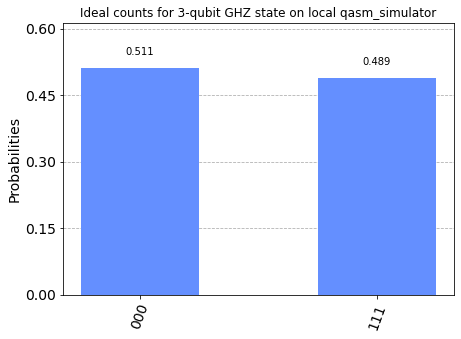

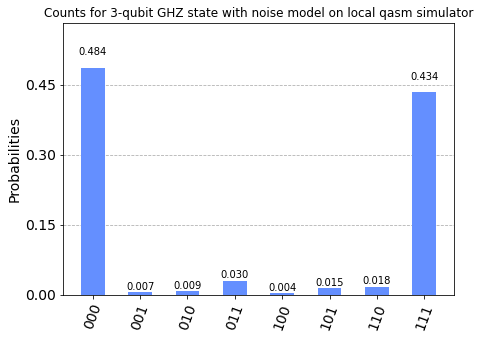

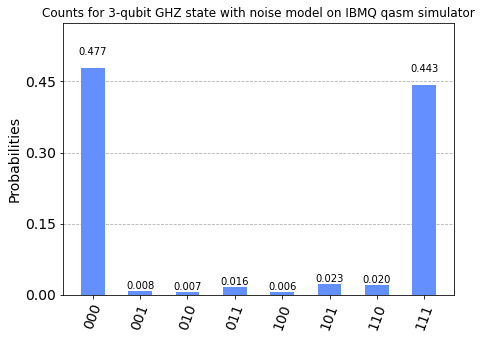

Job Status: job has successfully run


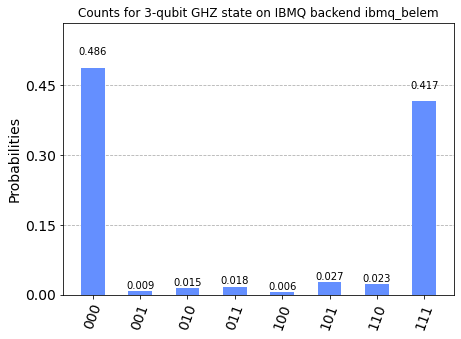

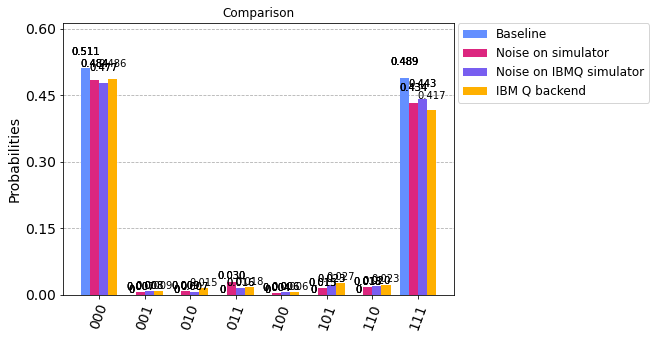

Name                 #Qubits    Pending jobs
----                 -------    ------------
ibmq_lima            5          532
ibmq_belem           5          84
ibmq_quito           5          146
ibmq_manila          5          117
ibm_nairobi          7          223
ibm_oslo             7          297
Select a backend ('exit' to end): exit


In [ ]:
print("Ch 7: Adding the noise profile of an IBM Q machine to your local simulator")
print("--------------------------------------------------------------------------")

# Import Qiskit and load account
from qiskit import Aer, IBMQ, QuantumCircuit, execute
from qiskit.providers.aer.noise import NoiseModel
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

import numpy as np
np.set_printoptions(precision=3)
from  IPython.core.display import display

print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

global backend, noise_model

def select_backend():
    # Get all available and operational backends.
    available_backends = provider.backends(filters=lambda b: not b.configuration().simulator and b.configuration().n_qubits > 1 and b.status().operational)
    
    # Fish out criteria to compare
    print("{0:20} {1:<10} {2:<10}".format("Name","#Qubits","Pending jobs"))
    print("{0:20} {1:<10} {2:<10}".format("----","-------","------------"))
         
    for n in range(0, len(available_backends)):
        backend = provider.get_backend(str(available_backends[n]))
        print("{0:20} {1:<10}".format(backend.name(),backend.configuration().n_qubits),backend.status().pending_jobs)

    select_backend=input("Select a backend ('exit' to end): ")
    
    if select_backend!="exit":
        backend = provider.get_backend(select_backend)
    else:
        backend=select_backend
    return(backend)

def build_noise_model(backend):

    # Construct the noise model from backend
    noise_model = NoiseModel.from_backend(backend)
    print(noise_model)
    return(noise_model)
    
def execute_circuit(backend, noise_model):
    # Basis gates for the noise model
    basis_gates = noise_model.basis_gates
    
    # Coupling map
    coupling_map = backend.configuration().coupling_map
    
    print("Coupling map: ",coupling_map)
    
    # Construct the GHZ-state quantum circuit
    circ = QuantumCircuit(3, 3)
    circ.h(0)
    circ.cx(0, 1)
    circ.cx(0, 2)
    circ.measure([0,1,2], [0,1,2])
    print(circ)

    
    # Execute on QASM simulator and get counts
    counts = execute(circ, Aer.get_backend('qasm_simulator')).result().get_counts(circ)
    display(plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state on local qasm_simulator'))
    
    # Execute noisy simulation on QASM simulator and get counts
    counts_noise = execute(circ, Aer.get_backend('qasm_simulator'), noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates).result().get_counts(circ)
    display(plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with noise model on local qasm simulator"))

    # Execute noisy simulation on the ibmq_qasm_simulator and get counts
    counts_noise_ibmq = execute(circ, provider.get_backend('ibmq_qasm_simulator'), noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates).result().get_counts(circ)
    display(plot_histogram(counts_noise_ibmq, title="Counts for 3-qubit GHZ state with noise model on IBMQ qasm simulator"))
    
    # Execute job on IBM Q backend and get counts
    job = execute(circ, backend)
    job_monitor(job)
    counts_ibmq=job.result().get_counts()
    
    title="Counts for 3-qubit GHZ state on IBMQ backend " + backend.name()
    display(plot_histogram(counts_ibmq, title=title))

    # Display the results for all runs
    display(plot_histogram([counts, counts_noise, counts_noise_ibmq, counts_ibmq], bar_labels=True, legend=["Baseline","Noise on simulator", "Noise on IBMQ simulator", "IBM Q backend"], title="Comparison"))

while True:
    # Select backend
    back=select_backend()
    if back=="exit":
        break
    # Build noise model and then run the circuit
    noise=build_noise_model(back)
    execute_circuit(back, noise)

### Unitary

In [ ]:
print("Ch 7: Understanding your circuits with the unitary simulator")
print("------------------------------------------------------------")

# Import the required Qiskit classes
from qiskit import(QuantumCircuit, execute, Aer)

# Import some math that we might need
from math import pow

import numpy as np
np.set_printoptions(precision=3)

# Create some circuits
def circuits():
    circuits=[]
    # Circuit 1 - one qubit in superposition
    circuit1 = QuantumCircuit(1,1)
    circuit1.h(0)
    # Circuit 2 - two qubits in superposition
    circuit2 = QuantumCircuit(2,2)
    circuit2.h([0,1])
    # Circuit 3 - two entangled qubits
    circuit3 = QuantumCircuit(2,2)
    circuit3.h([0])
    circuit3.cx(0,1)
    # Bundle the circuits in a list and return the list
    circuits=[circuit1,circuit2,circuit3]
    return(circuits)

# Get unitary matrix from unitary simulator 
def show_unitary(circuit):
    global unit
    backend = Aer.get_backend('unitary_simulator') 
    unit=execute(circuit, backend).result().get_unitary(circuit)
    print("Unitary matrix for the circuit:\n-------------------------------\n",unit)

# Calculate and display the unitary matrix 
def calc_unitary(circuit,unitary):
    # Set number of shots
    shots=1000
    # Calculate possible number of outcomes, 2^n qubits
    binary=int(pow(2,circuit.width()/2))    
    # Set the binary key for correct binary conversion
    bin_key='0'+str(int(circuit.width()/2))+'b'        
    # Create a qubit vector based on all qubits in the ground state |0> and a results list for all possible outcomes.
    vector=[1]
    outcomes=[format(0, bin_key)+":"]
    for q in range (1,binary):
        vector.append(0)
        outcomes.append(format(q, bin_key)+":")
    qubits=np.array(vector)    
    # Calculate the dot product of the unitary matrix and the qubits set by the qubits parameter.
    a_thru_d=np.dot(unitary,qubits)    
    # Print the probabilities (counts) of the calculated outcome.
    calc_counts={}
    for out in range (0,len(a_thru_d)):
        calc_counts[outcomes[out]]=(int(pow(abs(a_thru_d[out]),2)*shots))
    print("\nCalculated counts:\n------------------\n",calc_counts)    
    # Automate creation of measurement gates from number of qubits 
    # Run the circuit on the backend
    if circuit.width()==2:
        circuit.measure([0],[0])
    else: 
        circuit.measure([0,1],[0,1])
    backend_count = Aer.get_backend('qasm_simulator') 
    counts=execute(circuit, backend_count,shots=shots).result().get_counts(circuit)    
    # Print the counts of the measured outcome.
    print("\nExecuted counts:\n----------------\n",counts,"\n")

# Main loop
def main():
    user_input=1
    print("\nEnter the number for the circuit to explore:\n--------------------------------------------")
    while user_input!=0:
        print("\n0. Exit \n1. One qubit superposition\n2. Two qubit superposition\n3. Two qubit entanglement\n4. Import QASM from IBM Quantum Experience")
        user_input=int(input())
        if user_input!=0:
            if user_input==4:
                # From Qasm to Qiskit
                print("Paste a QASM string after stripping off any measurement gates:")
                qc = QuantumCircuit.from_qasm_str(input())
                print("\nImported circuit:\n-----------------")
            else:    
                circ=circuits()
                qc=circ[user_input-1]
                print("\nSelected circuit:\n-----------------")
            print(qc)
            show_unitary(qc)
            calc_unitary(qc,unit)
        else:
            print("Exiting")


if __name__ == '__main__':
    main()

Ch 7: Understanding your circuits with the unitary simulator
------------------------------------------------------------

Enter the number for the circuit to explore:
--------------------------------------------

0. Exit 
1. One qubit superposition
2. Two qubit superposition
3. Two qubit entanglement
4. Import QASM from IBM Quantum Experience
3

Selected circuit:
-----------------
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
Unitary matrix for the circuit:
-------------------------------
 Operator([[ 0.707+0.00e+00j,  0.707-8.66e-17j,  0.   +0.00e+00j,
            0.   +0.00e+00j],
          [ 0.   +0.00e+00j,  0.   +0.00e+00j,  0.707+0.00e+00j,
           -0.707+8.66e-17j],
          [ 0.   +0.00e+00j,  0.   +0.00e+00j,  0.707+0.00e+00j,
            0.707-8.66e-17j],
          [ 0.707+0.00e+00j, -0.707+8.66e-17j,  0.   +0.00e+00j,
            0.   +0.00e+00j]],
         input_dims=(2, 2), output_dims=(2, 2))

Calculat

### State Vector

Ch 7: Running “diagnostics” with the state vector simulator
-----------------------------------------------------------

Number of qubits:
4
Superposition 's or entanglement 'e'?
(To add a phase angle, use 'sp or 'ep'.)
ep
4 qubit quantum circuit:
------------------------
     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
State vector for the 4 qubit circuit:

 Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))

State vector as Bloch sphere:


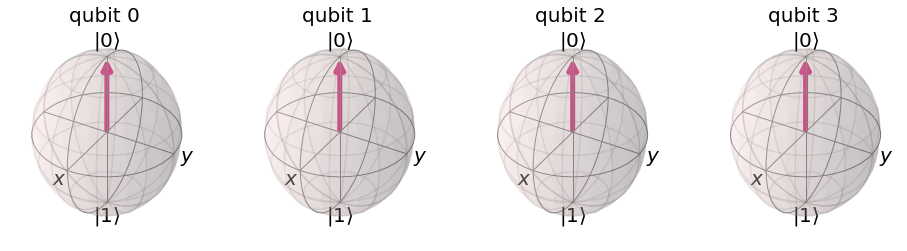


State vector as Q sphere:


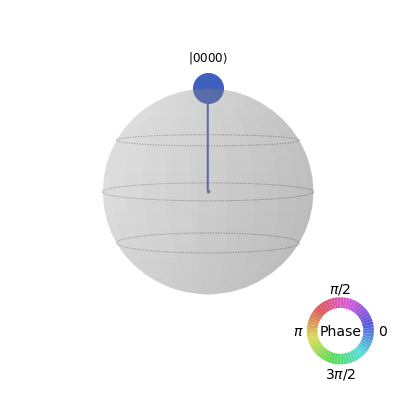

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.



Outcome:
 {'0000': 100.0} 

Press enter to continue...

4 qubit quantum circuit:
------------------------
          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ H ├
     └───┘
State vector for the 4 qubit circuit:

 Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j],
            dims=(2, 2, 2, 2))

State vector as Bloch sphere:


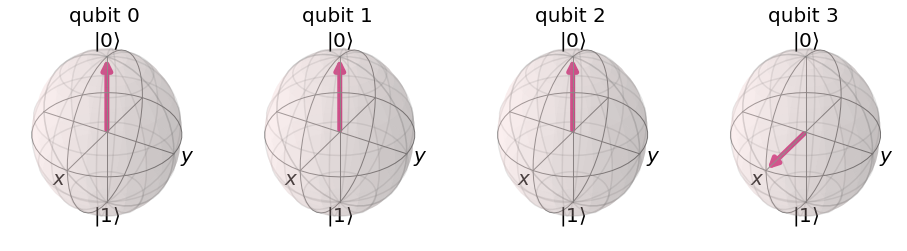


State vector as Q sphere:


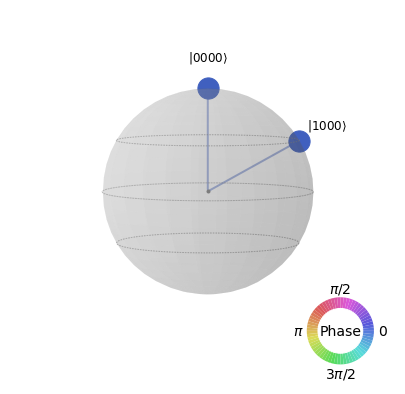

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.



Outcome:
 {'1000': 49.99, '0000': 50.01} 

Press enter to continue...

4 qubit quantum circuit:
------------------------
          ┌───┐
q_0: ─────┤ X ├
          └─┬─┘
q_1: ───────┼──
            │  
q_2: ───────┼──
     ┌───┐  │  
q_3: ┤ H ├──■──
     └───┘     
State vector for the 4 qubit circuit:

 Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j,
             0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j],
            dims=(2, 2, 2, 2))

State vector as Bloch sphere:


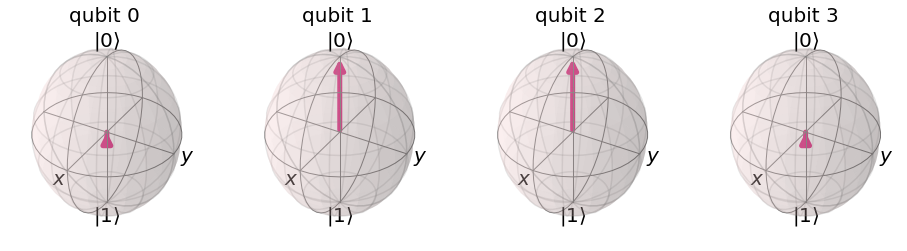


State vector as Q sphere:


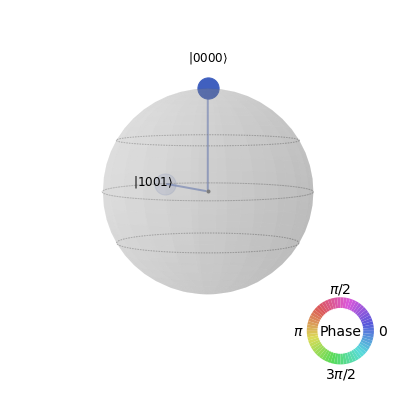

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.



Outcome:
 {'0000': 49.75, '1001': 50.25} 

Press enter to continue...

4 qubit quantum circuit:
------------------------
          ┌───┐     
q_0: ─────┤ X ├─────
          └─┬─┘┌───┐
q_1: ───────┼──┤ X ├
            │  └─┬─┘
q_2: ───────┼────┼──
     ┌───┐  │    │  
q_3: ┤ H ├──■────■──
     └───┘          
State vector for the 4 qubit circuit:

 Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j],
            dims=(2, 2, 2, 2))

State vector as Bloch sphere:


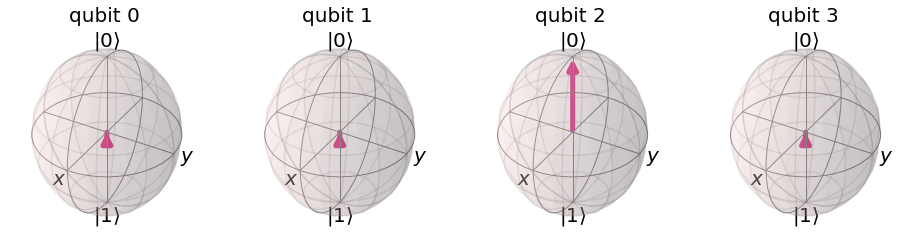


State vector as Q sphere:


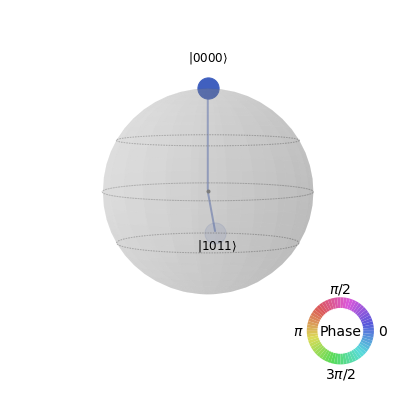

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.



Outcome:
 {'1011': 49.76, '0000': 50.24} 

Press enter to continue...

4 qubit quantum circuit:
------------------------
          ┌───┐          
q_0: ─────┤ X ├──────────
          └─┬─┘┌───┐     
q_1: ───────┼──┤ X ├─────
            │  └─┬─┘┌───┐
q_2: ───────┼────┼──┤ X ├
     ┌───┐  │    │  └─┬─┘
q_3: ┤ H ├──■────■────■──
     └───┘               
State vector for the 4 qubit circuit:

 Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.707+0.j],
            dims=(2, 2, 2, 2))

State vector as Bloch sphere:


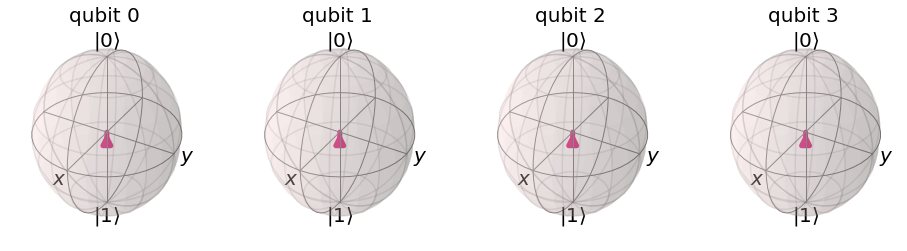


State vector as Q sphere:


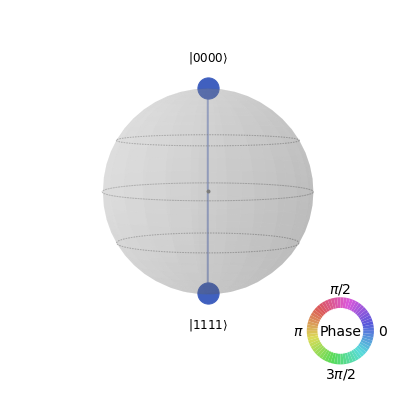

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.



Outcome:
 {'1111': 50.49, '0000': 49.51} 

Press enter to continue...

4 qubit quantum circuit:
------------------------
          ┌───┐               
q_0: ─────┤ X ├───────────────
          └─┬─┘┌───┐          
q_1: ───────┼──┤ X ├──────────
            │  └─┬─┘┌───┐     
q_2: ───────┼────┼──┤ X ├─────
     ┌───┐  │    │  └─┬─┘┌───┐
q_3: ┤ H ├──■────■────■──┤ T ├
     └───┘               └───┘
State vector for the 4 qubit circuit:

 Statevector([0.707+0.j , 0.   +0.j , 0.   +0.j , 0.   +0.j , 0.   +0.j ,
             0.   +0.j , 0.   +0.j , 0.   +0.j , 0.   +0.j , 0.   +0.j ,
             0.   +0.j , 0.   +0.j , 0.   +0.j , 0.   +0.j , 0.   +0.j ,
             0.5  +0.5j],
            dims=(2, 2, 2, 2))

State vector as Bloch sphere:


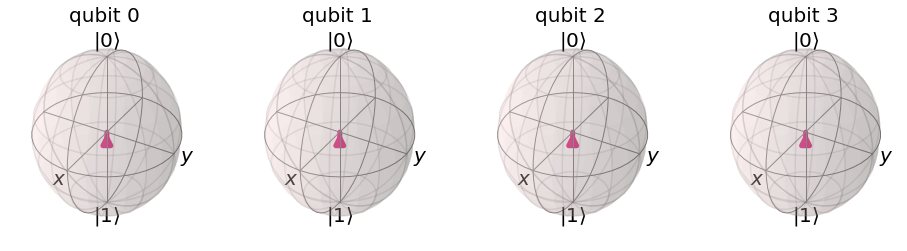


State vector as Q sphere:


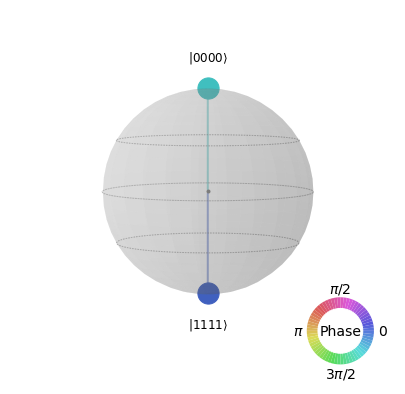

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.



Outcome:
 {'0000': 50.31, '1111': 49.69} 

Press enter to continue...

Ch 7: Running “diagnostics” with the state vector simulator
-----------------------------------------------------------

Number of qubits:
0
Superposition 's or entanglement 'e'?
(To add a phase angle, use 'sp or 'ep'.)
s


In [ ]:
# Import the required Qiskit classes
from qiskit import(QuantumCircuit, execute, Aer)

# Import Blochsphere visualization
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
# Import some math that we will need
from  IPython.core.display import display

# Set numbers display options
import numpy as np
np.set_printoptions(precision=3)

# Create a function that requests and display the state vector
# Use this function as a diagnositc tool when constructing your circuits


def measure(circuit):
    measure_circuit=QuantumCircuit(circuit.width())
    measure_circuit+=circuit
    measure_circuit.measure_all()
    #print(measure_circuit)
    backend_count = Aer.get_backend('qasm_simulator') 
    counts=execute(measure_circuit, backend_count,shots=10000).result().get_counts(measure_circuit)    
    # Print the counts of the measured outcome.
    print("\nOutcome:\n",{k: v / total for total in (sum(counts.values())/100,) for k, v in counts.items()},"\n")

def s_vec(circuit):
    backend = Aer.get_backend('statevector_simulator') 
    print(circuit.num_qubits, "qubit quantum circuit:\n------------------------")
    print(circuit)
    psi=execute(circuit, backend).result().get_statevector(circuit)
    print("State vector for the",circuit.num_qubits,"qubit circuit:\n\n",psi)
    print("\nState vector as Bloch sphere:")
    display(plot_bloch_multivector(psi))
    print("\nState vector as Q sphere:")
    display(plot_state_qsphere(psi))
    measure(circuit)
    input("Press enter to continue...\n")
    
# Main loop
def main():
    user_input=1
    while user_input!=0:
        print("Ch 7: Running “diagnostics” with the state vector simulator")
        print("-----------------------------------------------------------")    
        user_input=int(input("\nNumber of qubits:\n"))
        circ_type=input("Superposition 's or entanglement 'e'?\n(To add a phase angle, use 'sp or 'ep'.)\n")
        if user_input>0:
            qc = QuantumCircuit(user_input)
            s_vec(qc)
            qc.h(user_input-1)
            s_vec(qc)
            if user_input>1:
                for n in range(user_input-1):
                    if circ_type in ["e","ep"]:
                        qc.cx(user_input-1,n)
                    else:
                        qc.h(n)
                    s_vec(qc)
                if circ_type in ["sp","ep"]:
                    qc.t(user_input-1)
                    s_vec(qc)

if __name__ == '__main__':
    main()